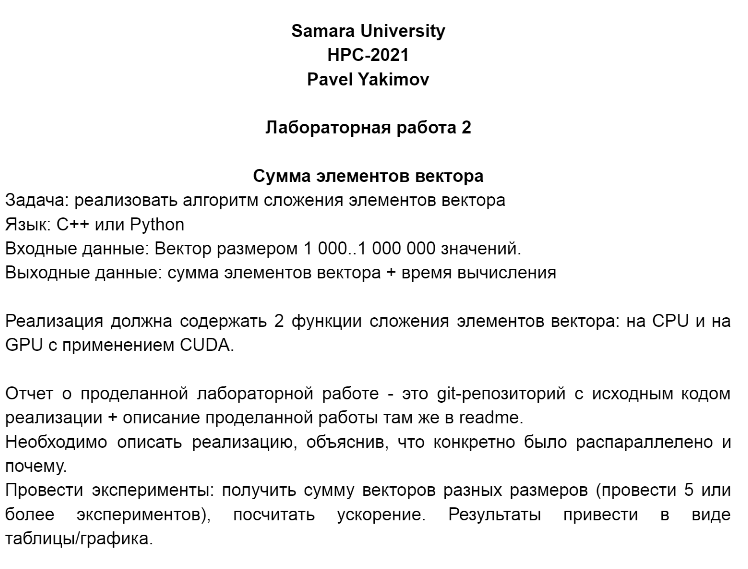

Download plugin jupyter

In [14]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-dcwj0ukg
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-dcwj0ukg
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 0a71d56e5dce3ff1f0dd2c47c29367629262f527
  Preparing metadata (setup.py) ... done


In [15]:
!/content/src/my_curand

/bin/bash: line 1: /content/src/my_curand: No such file or directory


In [16]:
!git clone https://github.com/Microsoft/vcpkg.git
!cd vcpkg
!./bootstrap-vcpkg.sh
!./vcpkg integrate install
!vcpkg install matplotlib-cpp

fatal: destination path 'vcpkg' already exists and is not an empty directory.
/bin/bash: line 1: ./bootstrap-vcpkg.sh: No such file or directory
/bin/bash: line 1: ./vcpkg: Is a directory
/bin/bash: line 1: vcpkg: command not found


In [17]:
!sudo apt install qtbase5-dev git cmake build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
git is already the newest version (1:2.34.1-1ubuntu1.10).
qtbase5-dev is already the newest version (5.15.3+dfsg-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [18]:
!nvcc -o /content/src/my_curand /content/src/my_curand.cu -lcurand

cc1plus: fatal error: /content/src/my_curand.cu: No such file or directory
compilation terminated.


Load the plugin

In [19]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


Вычисления на CPU

Информация о CPU

In [20]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.156
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

CPU с двумя ядрами

In [21]:
!cat /proc/cpuinfo | grep 'core id'

core id		: 0
core id		: 0


In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <iostream>
#include <vector>
#include <algorithm>
#include <limits>
#include <random>
#include <time.h>
#include <chrono>
#include <ctime>
#include <vector>
#include <cmath>
#include <fstream>

using namespace std;

void print(vector<int> v){
    for (auto el: v)
    {
        std::cout << el << ",";
    }
}

static std::vector<int> generate_data(size_t size, int amplitude){
    using value_type = int;
    static std::uniform_int_distribution<value_type> distribution(0, amplitude);
    static std::default_random_engine generator;

    std::vector<value_type> data(size);
    std::generate(data.begin(), data.end(), []() { return distribution(generator);});
    return data;
}

int summ(int num_rows, vector<int> v){
    int result = 0;

    for (auto el: v){
        result += el;
    }
    return result;
}

int main(){
    int num_rows;
    unsigned int start_time;
    unsigned int end_time;
    unsigned int search_time;
    vector<int> v;

    vector<double> times;
    vector<int> vector_sizes;

    int j = 1000;
    for(int i = 1; i < j; i++){
      num_rows = 1000*i;
      v = generate_data(num_rows, 1);

      start_time =  clock();
      summ(num_rows, v);
      end_time = clock();
      search_time = end_time - start_time;

      std::cout << "The time: " << (double) search_time / CLOCKS_PER_SEC << "s ";
      std::cout << "Vector size: " << num_rows << "x" << num_rows;
      std::cout << "\n";

      times.push_back((double) search_time / CLOCKS_PER_SEC);
      vector_sizes.push_back(num_rows);
    }

    std::ofstream out("data.txt");
    if (out.is_open()){
        for (int i = 0; i < j - 1; i++){
            cout << i;
            out << vector_sizes[i] << " " << times[i] << "\n";
        }
    }
    out.close();
    return 0;
}

In [ ]:
f = open("data.txt", "r")
times = []
sizes = []

for l in f:
  size, time = l.split(" ")
  times.append(float(time.rstrip("\n")))
  sizes.append(float(size))


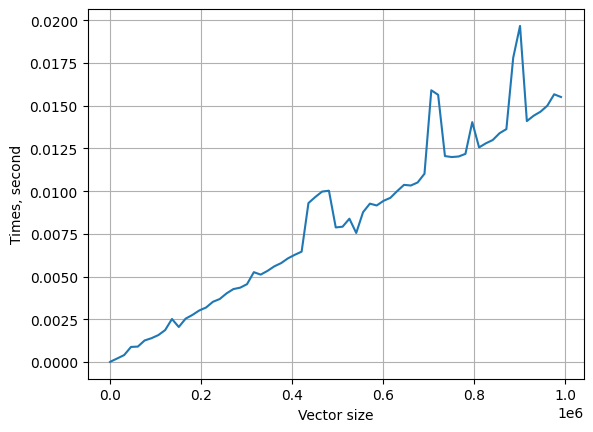

In [23]:
import matplotlib.pyplot as plt

step = 15
plt.plot([0] + sizes[::step], [0] + times[::step])
plt.xlabel("Vector size")
plt.ylabel("Times, second")
plt.grid()
plt.show()

Вычисления на GPU

Информация о GPU

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!sudo apt update

In [ ]:
!sudo apt install lshw

In [12]:
!sudo lshw -class display

  *-display
       description: 3D controller
       product: TU104GL [Tesla T4]
       vendor: NVIDIA Corporation
       physical id: 4
       bus info: pci@0000:00:04.0
       version: a1
       width: 64 bits
       clock: 33MHz
       capabilities: msix pm bus_master cap_list
       configuration: driver=nvidia latency=0
       resources: iomemory:30-2f iomemory:30-2f irq:11 memory:c0000000-c0ffffff memory:380000000-38fffffff memory:390000000-391ffffff


In [24]:
%%cu

#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>
#include <stdlib.h>

using namespace std;

int main() {
  int nDevices;
  cudaGetDeviceCount(&nDevices);

  printf("Number of devices: %d\n", nDevices);

  for (int i = 0; i < nDevices; i++) {
    cudaDeviceProp prop;
    cudaGetDeviceProperties(&prop, i);
    printf("Device Number: %d\n", i);
    printf("  Device name: %s\n", prop.name);
    printf("  Memory Clock Rate (MHz): %d\n",
           prop.memoryClockRate/1024);
    printf("  Memory Bus Width (bits): %d\n",
           prop.memoryBusWidth);
    printf("  Peak Memory Bandwidth (GB/s): %.1f\n",
           2.0*prop.memoryClockRate*(prop.memoryBusWidth/8)/1.0e6);
    printf("  Total global memory (Gbytes) %.1f\n",(float)(prop.totalGlobalMem)/1024.0/1024.0/1024.0);
    printf("  Shared memory per block (Kbytes) %.1f\n",(float)(prop.sharedMemPerBlock)/1024.0);
    printf("  minor-major: %d-%d\n", prop.minor, prop.major);
    printf("  Warp-size: %d\n", prop.warpSize);
    printf("  Concurrent kernels: %s\n", prop.concurrentKernels ? "yes" : "no");
    printf("  Concurrent computation/communication: %s\n\n",prop.deviceOverlap ? "yes" : "no");
  }
}

Number of devices: 1
Device Number: 0
  Device name: Tesla T4
  Memory Clock Rate (MHz): 4883
  Memory Bus Width (bits): 256
  Peak Memory Bandwidth (GB/s): 320.1
  Total global memory (Gbytes) 14.7
  Shared memory per block (Kbytes) 48.0
  minor-major: 5-7
  Warp-size: 32
  Concurrent kernels: yes
  Concurrent computation/communication: yes




Сумма элементово вектора

Было распараллелено вычисление суммы элементов вектора.
Параллельные потоки брали элемент вектора по индексу и прибавляли результат в область памяти.




In [ ]:
%%cu

#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <fstream>

using namespace std;

__global__ void sumElementsOfVector(int* array, int* result, int size){
    // Получаем идентификатор грида и блока
    int blockId = blockIdx.x;
    int threadId = threadIdx.x;

    // Вычисляем индекс элемента массива, обрабатываемого данным потоком
    int index = blockId * blockDim.x + threadId;

    // Проверяем, чтобы индекс не выходил за пределы размера массива
    if (index > size) {
        return;
    }
    // Выполняем суммирование элемента массива
    atomicAdd(result, array[index]);

}

double sum_cuda(int* array, int size){
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    int* arrayDevice;  // Указатель на массив в глобальной памяти устройства
    int* resultDevice; // Указатель на переменную результата

    // Выделяем память для массива на устройстве
    cudaMalloc((void**)&arrayDevice, size * sizeof(int));

    // Выделяем память для переменной результата на устройстве
    cudaMalloc((void**)&resultDevice, sizeof(int));

    // Копируем массив из хоста в память устройства
    cudaMemcpy(arrayDevice, array, size * sizeof(int), cudaMemcpyHostToDevice);

    // Вычисляем количество блоков и потоков в каждом блоке
    int blockSize = 256;
    int gridSize = (size + blockSize - 1) / blockSize;

    cudaEventRecord(start, 0);

    sumElementsOfVector<<<gridSize, blockSize>>>(arrayDevice, resultDevice, size);

    cudaEventRecord(stop, 0);
    cudaEventSynchronize(stop);

    float KernelTime;
    cudaEventElapsedTime(&KernelTime, start, stop);
    printf("Time: %.2f milliseconds, size matrix: %d \n", KernelTime, size);
    cudaFree(arrayDevice);
    cudaFree(resultDevice);
    return (double) KernelTime / 1000.0;
}

int main(){
  vector<float> times;
  vector<int> sizes;

  int j = 1000;
  for(int i = 1; i < j; i++){
    int size = 1000*i;
    sizes.push_back(size);

    int array[size];
    for (int i = 0; i < size; i++){
        array[i] = i;
    }

    double time = sum_cuda(array, size);
    times.push_back(time);

  }

  if(cudaDeviceSynchronize() != cudaSuccess) {
    fprintf(stderr, "CUDA Error: %s\n", cudaGetErrorString(cudaPeekAtLastError()));
  }

  ofstream out("data_cuda.txt");
  if (out.is_open()){
      for (int i = 0; i < j - 1; i++){
          out << sizes[i] << " " << times[i] << "\n";
      }
  }
  out.close();
  return 0;
}

In [ ]:
f = open("data_cuda.txt", "r")
times_cuda = []
sizes_cuda = []


for l in f:
  size, time = l.split(" ")
  times_cuda.append(float(time.rstrip("\n")))
  sizes_cuda.append(int(size))


График GPU

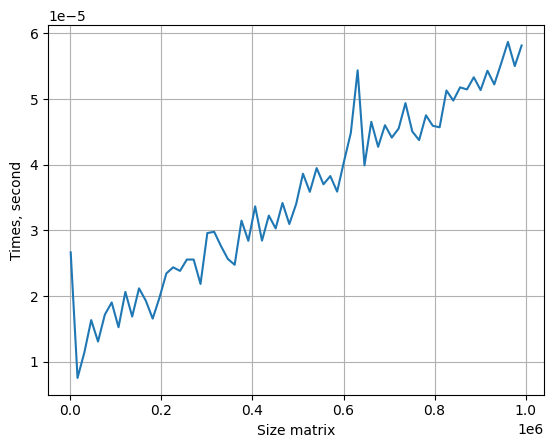

In [27]:
import matplotlib.pyplot as plt

step = 15;
plt.plot(sizes_cuda[::step], times_cuda[::step])
plt.xlabel("Size matrix")
plt.ylabel("Times, second")
plt.grid()
plt.show()

Сравнительный графи CPU и GPU

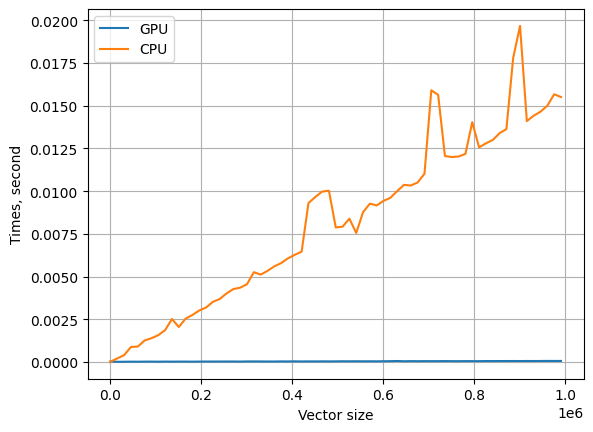

In [63]:
step = 15

plt.plot(sizes_cuda[::step], times_cuda[::step], label = 'GPU')
plt.plot([0] + sizes[::step], [0] + times[::step], label = 'CPU')
plt.xlabel("Vector size")
plt.ylabel("Times, second")
plt.legend()
plt.grid()
plt.show()